In [192]:
import pandas as pd

In [194]:
housing = pd.read_csv("housing_cleaned.csv", parse_dates= True, index_col=0)
housing

,county,city_village_or_cdp,housing_type,complex_address,units,acres,status,year,comment,conversion_date,cartodb_id,latitude,longitude,number,street,city,zip
the_geom,,,,,,,,,,,,,,,,,
0101000020E610000000CADFBDA36552C095F430B43A534440,Nassau,Freeport,APT,98 Rose St.,36,0.7,BUILT,1900,NaN,NaN,175,40.650229,-73.588119,98,Rose St,Freeport,11520.0
0101000020E6100000014EEFE2FD6B52C0B4E6C75F5A6A4440,Nassau,Port Washington,APT,55 Main St.,10,0.1,BUILT,1908,NaN,NaN,814,40.830883,-73.687371,55,Main St,Port Washington,11050.0
0101000020E610000001DA56B3CE6752C095490D6D005A4440,Nassau,Hempstead,APT,108 Grove St.,12,0.4,BUILT,1910,NaN,NaN,214,40.703138,-73.621991,108,Grove St,Hempstead,11550.0
0101000020E6100000E99C9FE2386852C0ECFA05BB61594440,Nassau,Hempstead,APT,21-31 Linden Pl.,12,0.4,BUILT,1913,NaN,NaN,211,40.698295,-73.628472,31,Linden Pl,Hempstead,11550.0
0101000020E61000005B5EB9DE366852C0342BDB87BC5B4440,Nassau,Hempstead,APT,298 Main St.,12,0.1,BUILT,1918,NaN,NaN,213,40.716691,-73.628349,298,Main St,Hempstead,11550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0101000020E610000022FC8BA0314F52C0969526A5A0634440,Suffolk,Brentwood,APT,75 Springfield Rd. & 2nd Ave.,114,9.3,BUILT,"2000, 2003",SRCIT-AFFORD,NaN,1594,40.778340,-73.237404,NaN,2nd Ave,Brentwood,11717.0
0101000020E6100000D3A0681EC06552C000E5EFDE51554440,Nassau,Freeport,COND,Ocean Watch Ct.,61,NaN,BUILT,"2008, 2015",NaN,NaN,158,40.666561,-73.589851,NaN,Ocean Ct,Freeport,11520.0
0101000020E61000000BDA9A632F5852C03BAEA12F18564440,Suffolk,Lindenhurst,APT,"580, 594 W. Montauk Hwy.",33,1.7,BUILT,"2009, 2019",SRCIT,NaN,1087,40.672613,-73.377892,594,W Montauk Hwy,Babylon,11757.0


In [195]:
!pip install folium

In [196]:
import folium

In [197]:
location= [40.7891, -73.1350]
m =folium.Map(location=location, zoom_start=9)
m

In [198]:
m.save('index.html')

In [199]:
location= [40.7891, -73.1350]
m =folium.Map(location=location, zoom_start=13)

for row in housing.iterrows():
    lat=row[1]['latitude']
    lon=row[1]['longitude']
    pop=str(row[1]['complex_address'])
    folium.Marker(location=[lat,lon],popup=pop).add_to(m)

m
    

In [200]:
m.save("general.html")

In [301]:
from folium.plugins import MarkerCluster

In [330]:
location= [40.7891, -73.1350]
m =folium.Map(location=location, zoom_start=13)

In [335]:
some_map = folium.Map(location=[housing['latitude'].mean(), 
                                housing['longitude'].mean()], 
                                zoom_start=10)

mc = MarkerCluster()

for row in housing.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude, row.longitude],popup="<b>Address: </b>%s </br> <b>Housing Type: </b>%s" %(row.complex_address, row.housing_type)))
    
some_map.add_child(mc)
some_map

In [336]:
some_map.save("index2.html")

In [205]:
housing["housing_type"].value_counts()

APT     1011
COND     614
COOP     387
Name: housing_type, dtype: int64

In [206]:
housing.groupby('housing_type')['units'].sum()

housing_type
APT     90774
COND    59911
COOP    31930
Name: units, dtype: int64

In [207]:
housing.groupby('housing_type')['acres'].sum()

housing_type
APT     5671.4
COND    9821.9
COOP    1386.3
Name: acres, dtype: float64

In [210]:
!pip install squarify

In [244]:
import matplotlib.pyplot as plt
import squarify 

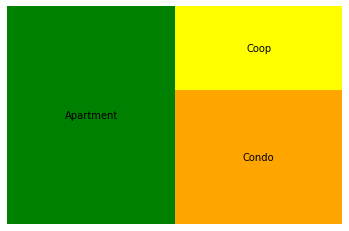

<Figure size 432x288 with 0 Axes>

In [246]:
s = squarify.plot(sizes=[1011,614,387], label=["Apartment", "Condo", "Coop"], color=["green","orange", "yellow"], alpha=1)
plt.axis('off')
plt.show()
plt.savefig('line_plot.pdf',transparent=True)  